In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [14]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [15]:
ids, ids.shape

(array([100000, 100001, 100002, ..., 349997, 349998, 349999]), (250000,))

In [16]:
tX.shape

(250000, 30)

## Do your thing crazy machine learning thing here :) ...

### 1. To check the correlations between each feature
#### [4/6,12,26,27,28], [6/4,12,26,27,28], [9/29], [12/4,626,27,28], [23/24,25], [24/23,25], [25/23,24], [26/4,6,12,27,28], [27/4,6,12,26,28], [28/4,6,12,26,27], [29/9] These features have strong correlations

In [17]:
correlation_matrix = np.corrcoef(tX, rowvar=0)

[Text(0, 0, 'X0'),
 Text(0, 0, 'X1'),
 Text(0, 0, 'X2'),
 Text(0, 0, 'X3'),
 Text(0, 0, 'X4'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X6'),
 Text(0, 0, 'X7'),
 Text(0, 0, 'X8'),
 Text(0, 0, 'X9'),
 Text(0, 0, 'X10'),
 Text(0, 0, 'X11'),
 Text(0, 0, 'X12'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X14'),
 Text(0, 0, 'X15'),
 Text(0, 0, 'X16'),
 Text(0, 0, 'X17'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X20'),
 Text(0, 0, 'X21'),
 Text(0, 0, 'X22'),
 Text(0, 0, 'X23'),
 Text(0, 0, 'X24'),
 Text(0, 0, 'X25'),
 Text(0, 0, 'X26'),
 Text(0, 0, 'X27'),
 Text(0, 0, 'X28'),
 Text(0, 0, 'X29')]

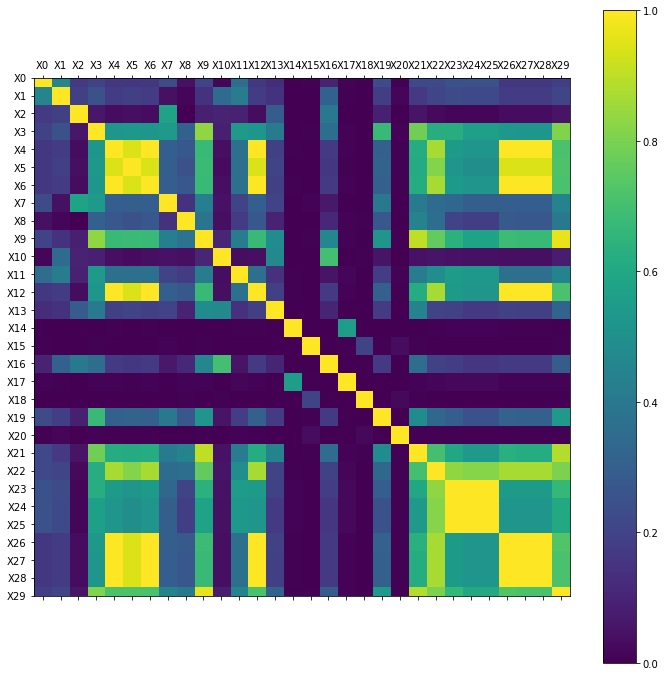

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
fig.colorbar(hot_img) 
ticks = np.arange(0, 30, 1) 
ax.set_xticks(ticks)
ax.set_yticks(ticks) 
names = ['X' + str(i) for i in range(tX.shape[1])] 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 

Text(0.5, 1.0, 'tX28')

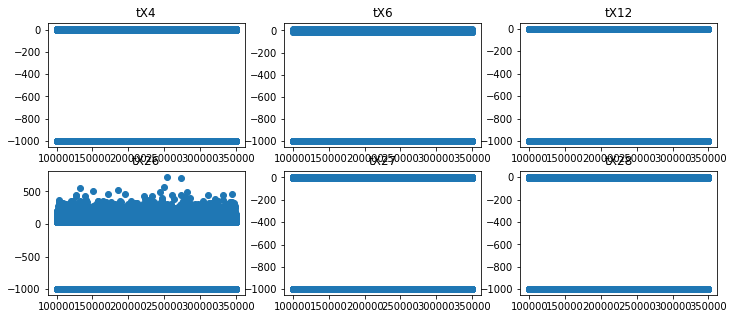

In [19]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(231)
ax1.scatter(ids, tX[:,4])
ax1.set_title('tX4')

ax2 = plt.subplot(232)
ax2.scatter(ids, tX[:,6])
ax2.set_title('tX6')

ax3 = plt.subplot(233)
ax3.scatter(ids, tX[:,12])
ax3.set_title('tX12')

ax4 = plt.subplot(234)
ax4.scatter(ids, tX[:,26])
ax4.set_title('tX26')

ax5 = plt.subplot(235)
ax5.scatter(ids, tX[:,27])
ax5.set_title('tX27')

ax6 = plt.subplot(236)
ax6.scatter(ids, tX[:,28])
ax6.set_title('tX28')

### 2. unique of each feature
#### Each column seems not having single value. However, the 23rd feature only has 4 values, hence it needs to be investigated more.

In [20]:
for i in range(tX.shape[1]):
    print(i, len(np.unique(tX[:, i])))

0 108338
1 101637
2 100558
3 115563
4 7087
5 68366
6 16593
7 4692
8 59042
9 156098
10 5931
11 2829
12 1002
13 59639
14 4971
15 6285
16 61929
17 4987
18 6285
19 87836
20 6285
21 179740
22 4
23 86590
24 8558
25 6285
26 42464
27 8628
28 6286
29 103559


#### The values in column-'PRI_jet_num' seem like categorical values. It's better check the characteristics for each category.

In [21]:
np.unique(tX[:, 22])

array([0., 1., 2., 3.])

In [22]:
import csv

In [23]:
with open(DATA_TRAIN_PATH,'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]
    features = rows[0][2:]

In [24]:
features[22]

'PRI_jet_num'

### 3. Split the data into 4 groups(each corresponds to PRI_jet_num = 0, 1, 2, 3)

In [25]:
from preprocess import *

In [26]:
# split data into 4 groups
Train_set_X = []    # list 
Train_set_y = []
Train_set_ids = []
for i in range(4):
    y_jet, tx_jet, ids_jet = split_data(y, tX, ids, i)
    Train_set_X.append(tx_jet)
    Train_set_y.append(y_jet)
    Train_set_ids.append(ids_jet)

### 4. To analyze the variance of columns for each group

In [27]:
for i in range(4):
    print(variance_analysis(Train_set_X[i]))

[4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29]
[4, 5, 6, 12, 22, 26, 27, 28]
[22]
[22]


In [28]:
# to delete the zero-variance columns
Feature_jet = []
for i in range(4):
    deleted_columns = variance_analysis(Train_set_X[i]) 
    Train_set_X[i],header = delete_columns(Train_set_X[i], deleted_columns, features)
    Feature_jet.append(header)

In [29]:
[Train_set_X[i].shape[1] for i in range(4)]

[18, 22, 29, 29]

### 5. To detect the abnormal values and fix them 

In [30]:
for i in range(4):
    fix_null(Train_set_X[i])
    fix_outlier(Train_set_X[i])

In [31]:
# to check the processes
for i in range(4):
    print(Train_set_X[i][Train_set_X[i] == -999].shape)

(0,)
(0,)
(0,)
(0,)


In [32]:
abnormal_num = 0
for i in range(4):
    for col in range(Train_set_X[i].shape[1]):
        current_col = Train_set_X[i][:,col]
        std = np.std(current_col)
        mean = np.mean(current_col)
        left_boundary = mean - 2 * std
        right_boundary = mean + 2 * std
        abnormal_num += current_col[(current_col<left_boundary) \
                                        & (current_col>right_boundary)].shape[0]
print(abnormal_num)

0


In [33]:
Train_set_X

[array([[ 1.43905e+02,  8.14170e+01,  8.09430e+01, ...,  3.10820e+01,
          6.00000e-02,  8.60620e+01],
        [ 1.75864e+02,  1.69150e+01,  1.34805e+02, ...,  2.72300e+00,
         -8.71000e-01,  5.31310e+01],
        [ 1.05594e+02,  5.05590e+01,  1.00989e+02, ...,  3.77910e+01,
          2.40000e-02,  1.29804e+02],
        ...,
        [ 1.11452e+02,  5.81790e+01,  6.80830e+01, ...,  4.67370e+01,
         -8.67000e-01,  8.04080e+01],
        [ 9.49510e+01,  1.93620e+01,  6.88120e+01, ...,  1.21500e+01,
          8.11000e-01,  1.12718e+02],
        [ 1.11452e+02,  7.27560e+01,  7.08310e+01, ...,  4.07290e+01,
         -1.59600e+00,  9.94050e+01]]),
 array([[160.937     ,  68.768     , 103.235     , ...,   0.725     ,
           1.158     ,  46.226     ],
        [112.4055    , 117.21552091, 125.953     , ...,   2.053     ,
          -2.028     ,  44.251     ],
        [154.916     ,  10.418     ,  94.714     , ...,  -0.715     ,
          -1.724     ,  30.638     ],
        ...,


In [39]:
def split(y, x, r, seed=1):
    np.random.seed(seed)
    perm = np.random.permutation(len(y))
    sx = x[perm]
    sy = y[perm]
    sample = int(len(y) * r)
    x_training, x_test = sx[ : sample], sx[sample : ]
    y_training, y_test = sy[ : sample], sy[sample : ]
    return y_training, x_training, y_test, x_test

In [40]:
Y_train=[]
X_train=[]
Y_test=[]
X_test=[]
for i in range(4): 
    y_train,x_train,y_test,x_test = split (Train_set_y[i],Train_set_X[i],0.8)
    Y_train.append(y_train)
    X_train.append(x_train)
    Y_test.append(y_test)
    X_test.append(x_test)

In [41]:
X_train

[array([[ 1.1732500e+02,  6.4020000e+00,  8.3105000e+01, ...,
          5.8080000e+00, -2.8880000e+00,  1.4007700e+02],
        [ 2.0757199e+02,  8.1156000e+01,  1.5168800e+02, ...,
          3.1570000e+01, -7.4300000e-01,  1.5044900e+02],
        [ 1.1145200e+02,  7.1330000e+01,  5.3402000e+01, ...,
          4.8431000e+01,  1.1600000e-01,  5.1287000e+01],
        ...,
        [ 8.8401000e+01,  2.4812000e+01,  5.8821000e+01, ...,
          1.7974000e+01,  1.7440000e+00,  9.3403000e+01],
        [ 8.7371000e+01,  5.5582000e+01,  6.3066000e+01, ...,
          2.1043000e+01, -6.6000000e-02,  6.7407000e+01],
        [ 1.1145200e+02,  7.2434000e+01,  5.7150000e+01, ...,
          3.6419000e+01,  2.3460000e+00,  9.8987000e+01]]),
 array([[126.39  ,  41.132 ,  89.781 , ...,  -0.995 ,   0.26  ,  80.53  ],
        [ 94.564 ,  73.189 ,  78.509 , ...,  -1.338 ,  -1.227 ,  36.267 ],
        [ 97.242 ,  60.88  ,  66.469 , ...,  -1.129 ,  -1.666 ,  32.041 ],
        ...,
        [112.4055,  79.446 

In [42]:
from implement import *

In [ ]:
for i in range(4):
    w1,_=least_squares_GD(Y_train[i], X_train[i], np.ones((X_train[i].shape[1],1)), 1000, 0.07)
    w2,_=stochastic_gradient_descent(Y_train[i], X_train[i],np.ones((X_train[i].shape[1],1)), 0.1, 3000, 0.07)
    w3,_=least_squares(Y_train[i], X_train[i])
    w4,_=ridge_regression(Y_train[i], X_train[i], 0.01)
    w5,_=logistic_regression(Y_train[i], X_train[i], np.ones((X_train[i].shape[1],1)), 3000, 0.07)
    w6,_=reg_logistic_regression(Y_train[i], X_train[i], 0.01, np.ones((X_train[i].shape[1],1)), 3000, 0.07)
    

## Generate predictions and save ouput in csv format for submission:

In [33]:
DATA_TEST_PATH = '../data/train.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = 'prediction_haluhalu' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#x_training,x_test = Train_set_X[i][training_idx,:], Train_set_X[i][test_idx,:]
#y_training,y_test = Train_set_y[i][training_idx,:],Train_set_y[i][test_idx,:]